In [1]:
import numpy as np
from tc_utils import *
from scipy.special import erf

['SS304' 'loglog' '0.385' '1672.000' '2.23367e-07' '-5.04296e-05'
 '3.01386e-03' '6.96502e-02' '3.42081e-02' '-1.71132e-01' '6.23536e-01'
 '1.49213e-01' '1.19786e+02']
[3.850e-01 1.672e+03]
[ 2.23367e-07 -5.04296e-05  3.01386e-03  6.96502e-02]


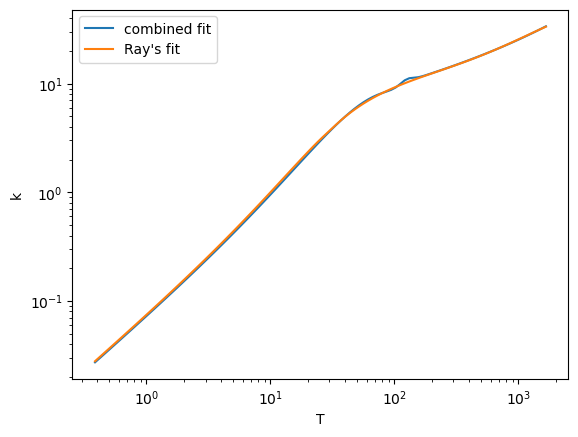

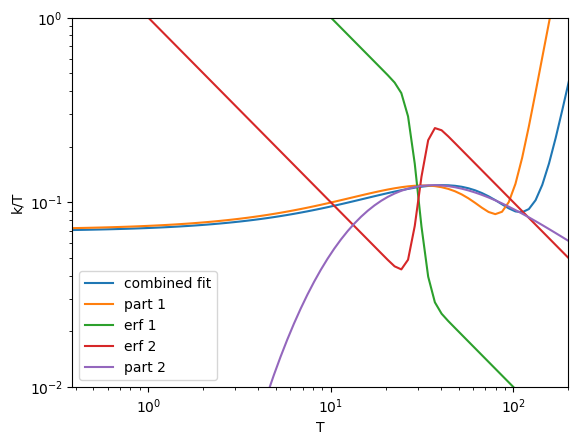

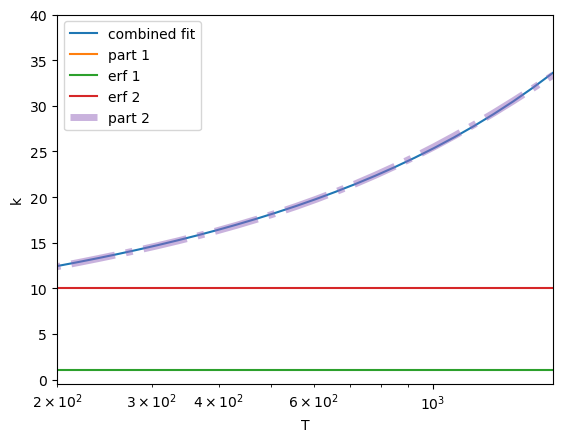

In [36]:
TCdata = np.loadtxt("..\\thermal_conductivity_compilation.csv", dtype=str, delimiter=',')
headers = TCdata[0]
mat_row = TCdata[-3]
print(mat_row)
num_hi = sum(1 for c in headers[4:] if c.isupper())
num_low = sum(1 for c in headers[4:-1] if c.islower())
fit_params = mat_row[4:]
fit_params = np.char.replace(fit_params, "^", "0")
fit_range, low_param, hi_param, erf_param = np.array(mat_row[2:4], dtype=float), np.array(fit_params[:num_low], dtype=float), np.array(fit_params[num_low:-1], dtype=float), float(fit_params[-1])





a, b, c, d, e, f, g, h = [0.071178604,
                            0.003452896,
                            -6.00E-05,
                            -4.89097297,
                            8.19463992,
                            -3.53989942,
                            0.70776994,
                            -0.27572305
                            ]

T = np.logspace(np.log10(fit_range[0]),np.log10(fit_range[1]),100)
part1 = np.log10(a*T + b*T**2 + c*T**3+(3e-9)*T**5)
erf1 = 0.5*(1-erf(15*(np.log10(T)-1.48)))
part2 = (d + e*np.log10(T) + f*np.log10(T)**2 + g*np.log10(T)**3+h*np.exp(np.log10(T)))
erf2 = 0.5*(1+erf(15*(np.log10(T)-1.48)))
log10k = part1*erf1 + part2*erf2 





mat = "SS304"

print(fit_range)
xs = np.logspace(np.log10(fit_range[0]),np.log10(fit_range[1]),100)

print(low_param)
big_data, data_dict = parse_raw(mat, f"lib\{mat}\RAW", plots=False)
# plot_datapoints(data_dict)
plt.plot(xs, loglog_func(xs, low_param, hi_param, erf_param), label='combined fit')
plt.plot(T, 10**log10k, label="Ray's fit")
plt.semilogx()
plt.semilogy()
plt.ylabel("k")
plt.xlabel("T")
plt.legend()
plt.show()


low_fit = T*np.polyval(low_param, T)
hi_fit = 10**np.polyval(hi_param, np.log10(T))

plt.figure()
# plt.plot(xs, loglog_func(xs, low_param, hi_param, erf_param)/xs, label='combined fit')
plt.plot(xs, low_fit/xs, label='combined fit')

# plt.plot(T, (10**log10k)/T, label="Ray's fit")
plt.plot(T, (10**part1)/T, label="part 1")
plt.plot(T, (10**erf1)/T, label="erf 1")
plt.plot(T, (10**erf2)/T, label="erf 2")
plt.plot(T, (10**part2)/T, label="part 2")
plt.semilogx()
plt.semilogy()
plt.ylabel("k/T")
plt.xlabel("T")
plt.xlim((np.min(xs),200))
plt.ylim((0.01, 1))
plt.legend()
plt.show()

plt.figure()
# plt.plot(xs, loglog_func(xs, low_param, hi_param, erf_param), label='combined fit')
plt.plot(xs, hi_fit, label='combined fit')

plt.plot(T, (10**part1), label="part 1")
plt.plot(T, (10**erf1), label="erf 1")
plt.plot(T, (10**erf2), label="erf 2")
plt.plot(T, (10**part2), '-.', linewidth=5, label="part 2", alpha=0.5)
plt.semilogx()
plt.ylabel("k")
plt.xlabel("T")
plt.xlim((200, np.max(xs)))
plt.ylim((-0.5, 40))

plt.legend()
plt.show()